In [ ]:
# Warning: these results are terrible

In [54]:
import scvelo as scv
import scanpy as sc
import pandas as pd
import numpy as np

In [55]:
path_to_write='/home/sergio/Jnotebooks/SALMON/datasets/processed_adata/mousebrain/'

In [56]:
adata=sc.read(path_to_write+'adata_for_velocity_processed.h5ad')

In [63]:
adata.var.index=adata.var['gene_name']

In [57]:
clusters=['14','0','18']
adata=adata[adata.obs['leiden'].isin(clusters)]

In [65]:
sc.pp.neighbors(adata,n_neighbors=120,n_pcs=25)

In [66]:
sc.tl.umap(adata)

In [67]:
sc.tl.leiden(adata,key_added='oligo_leiden')

/home/sergio/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))


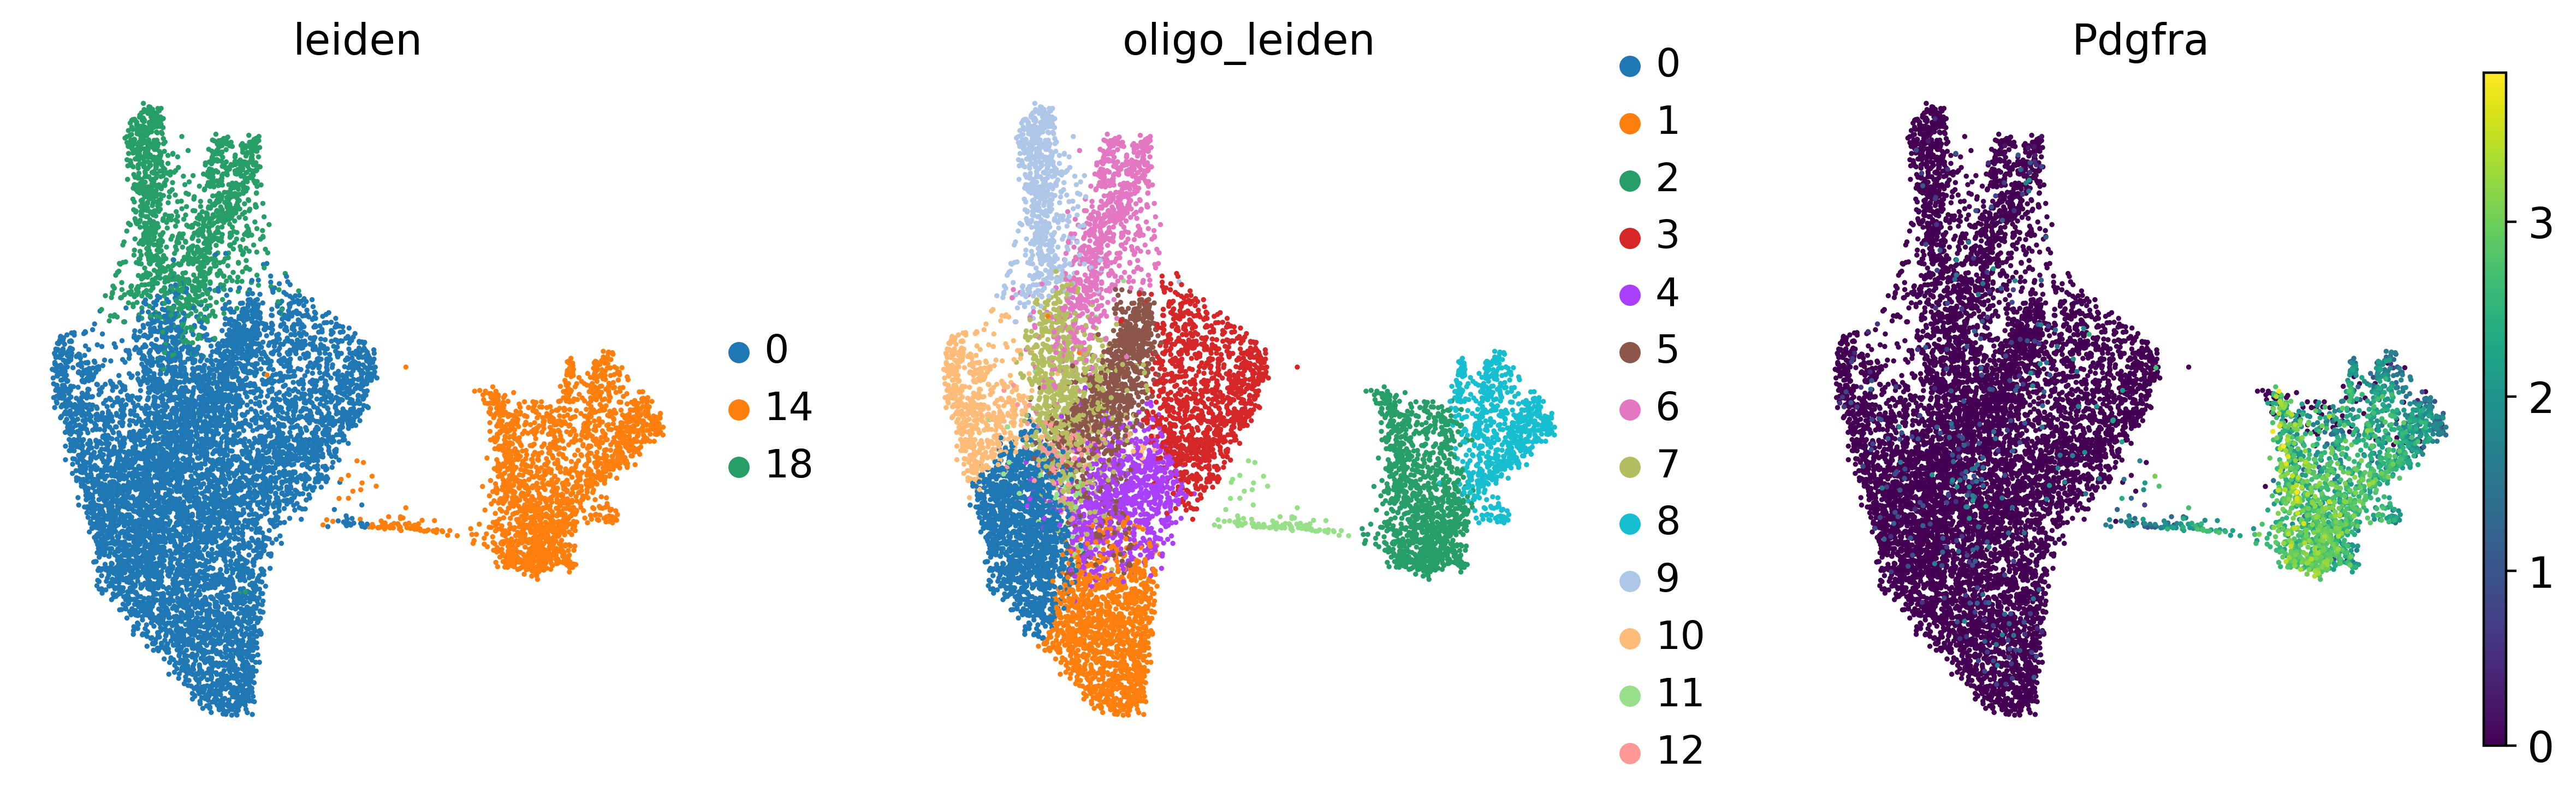

In [68]:
sc.pl.umap(adata,color=['leiden','oligo_leiden','Pdgfra'])

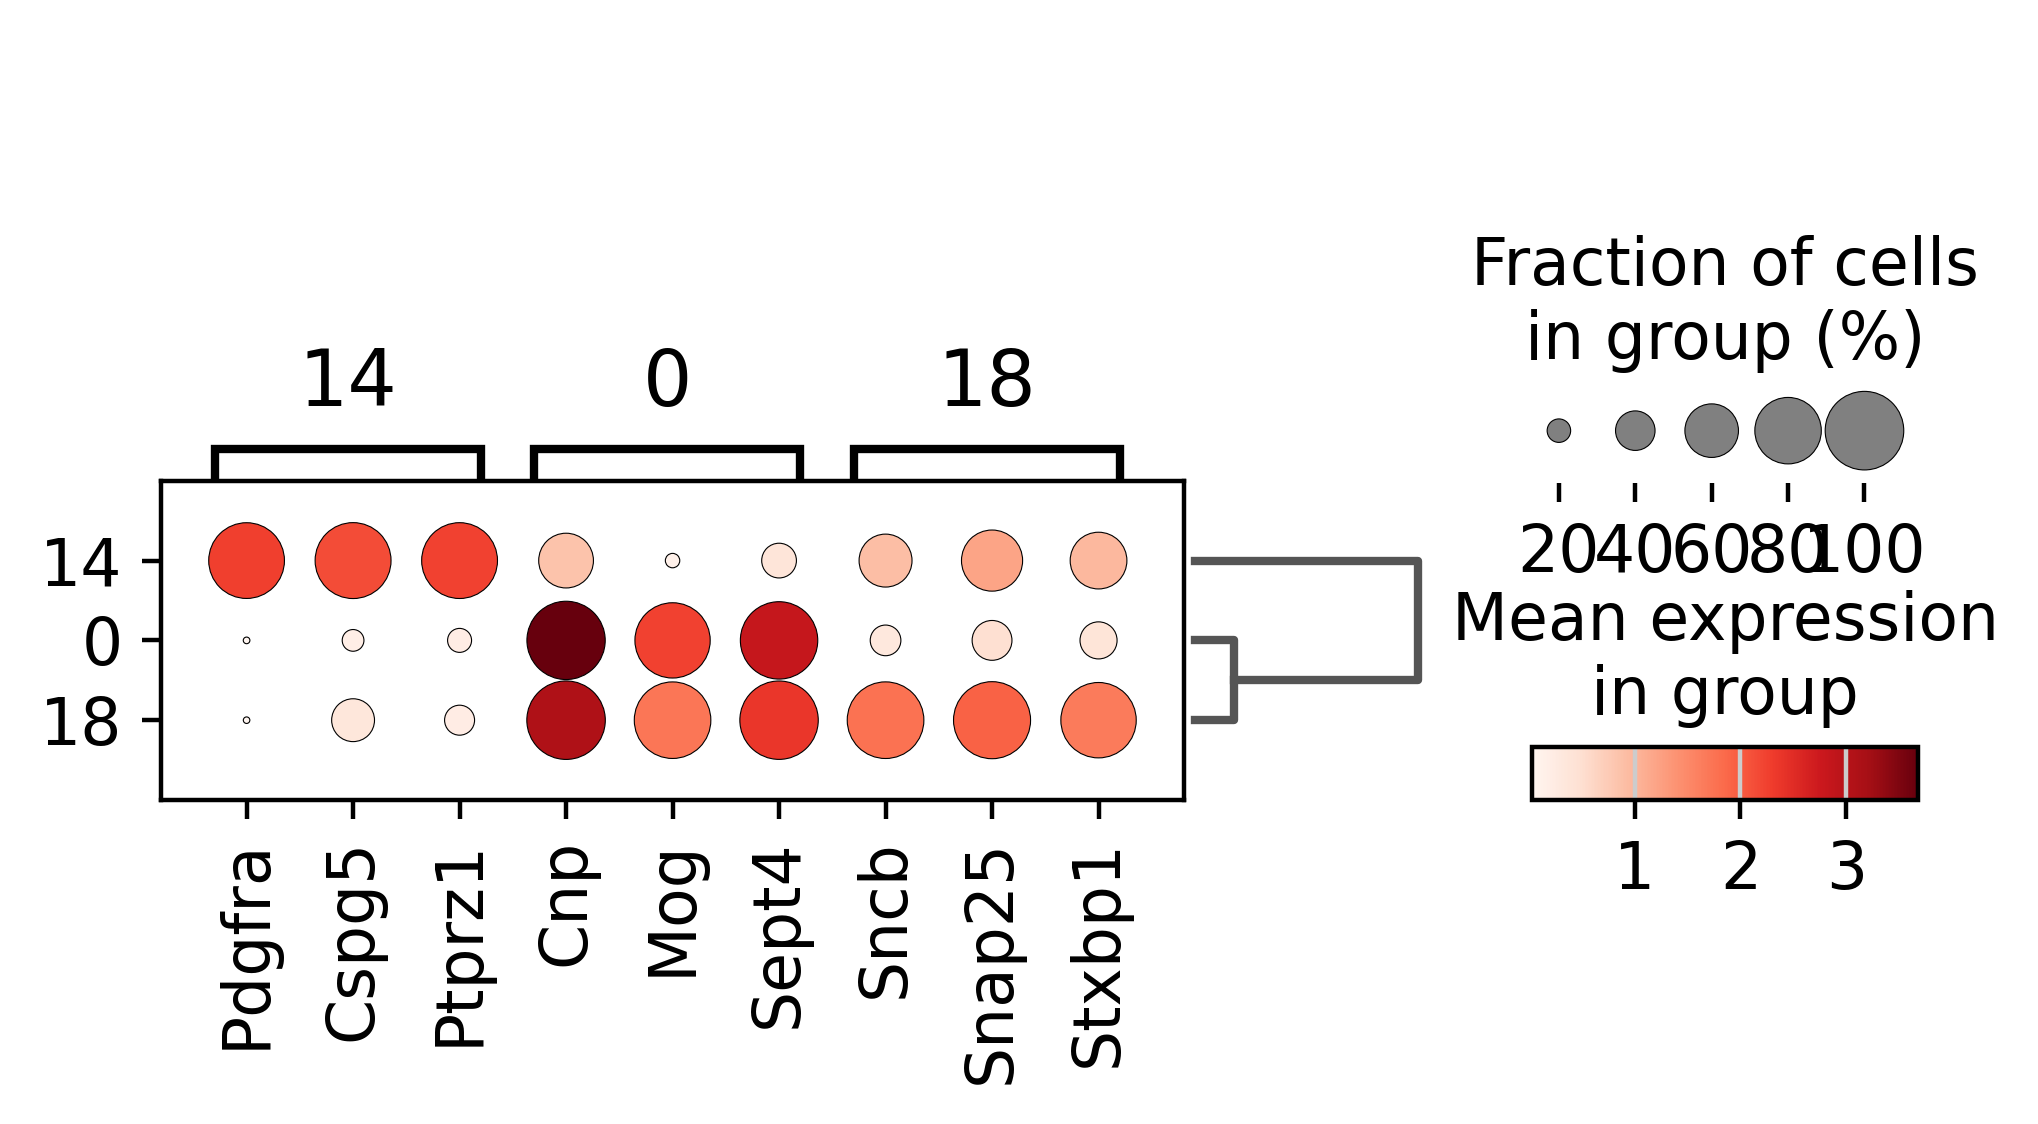

In [69]:
adata.uns['log1p']['base']=None
sc.tl.rank_genes_groups(adata,groupby='leiden')
sc.pl.rank_genes_groups_dotplot(adata,n_genes=3)

In [70]:
sc.pp.neighbors(adata)

In [ ]:
scv.pp.moments(adata, n_pcs=None, n_neighbors=None)
scv.tl.velocity(adata, mode='stochastic')
scv.tl.velocity_graph(adata)

Normalized count data: spliced, unspliced.
computing moments based on connectivities
    finished (0:00:02) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:04) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/32 cores)


  0%|          | 0/10406 [00:00<?, ?cells/s]

In [ ]:
scv.pl.velocity_embedding_stream(adata, basis='umap', color='leiden')

In [ ]:
scv.pl.velocity_embedding_grid(adata, basis='umap', color='leiden')

In [ ]:
sc.set_figure_params(scanpy=True, dpi=200, dpi_save=200, frameon=False, vector_friendly=True, fontsize=14, format='pdf', ipython_format='png2x')
sc.pl.umap(adata,color='velocity_self_transition')

In [ ]:
scv.pl.velocity_embedding_grid(adata, basis='spatial', color='leiden')

In [ ]:
sc.pl.spatial(adata,color='velocity_self_transition',spot_size=10,vmax=0.2)

In [46]:
scv.tl.rank_velocity_genes(adata, groupby='leiden', min_corr=.3)
df = pd.DataFrame(adata.uns['rank_velocity_genes']['names'])
df.head()

ranking velocity genes
    finished (0:00:00) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


0       14        20
0  Adamtsl1  Slc44a5     Prox1
1    Garnl3   Igsf21  Arhgef28
2     Gng12    Myo16       Fos
3  Arhgef28   Sema5b   Dpy19l1
4     Prox1    Cdh13    Sema3a

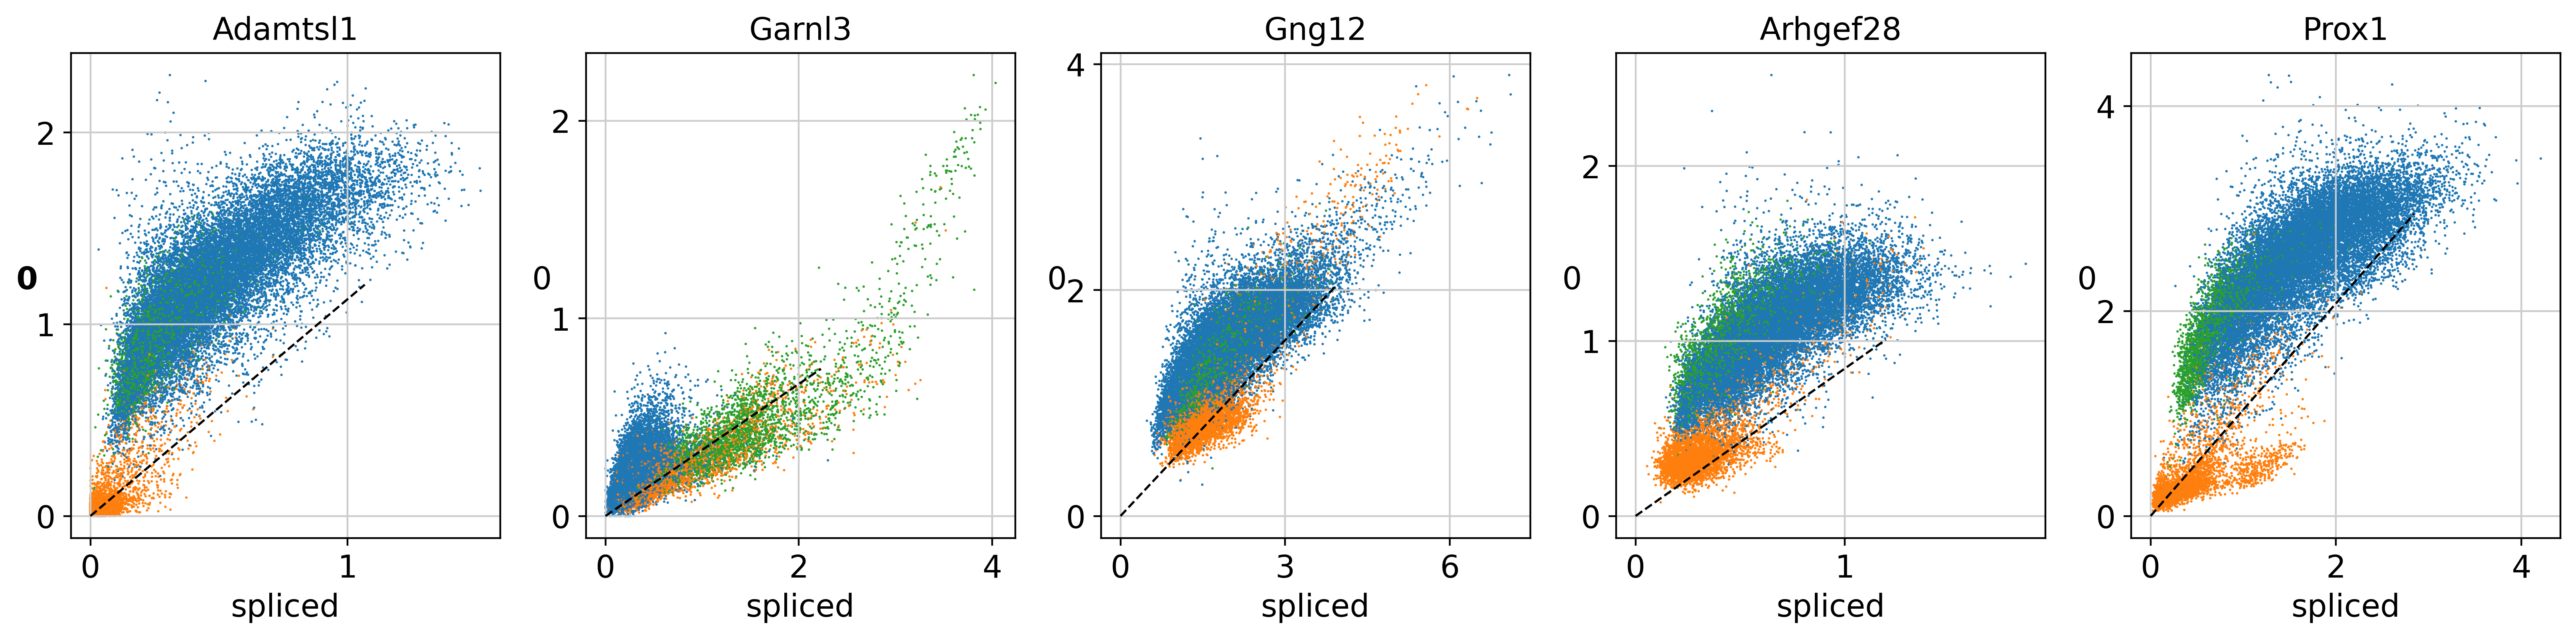

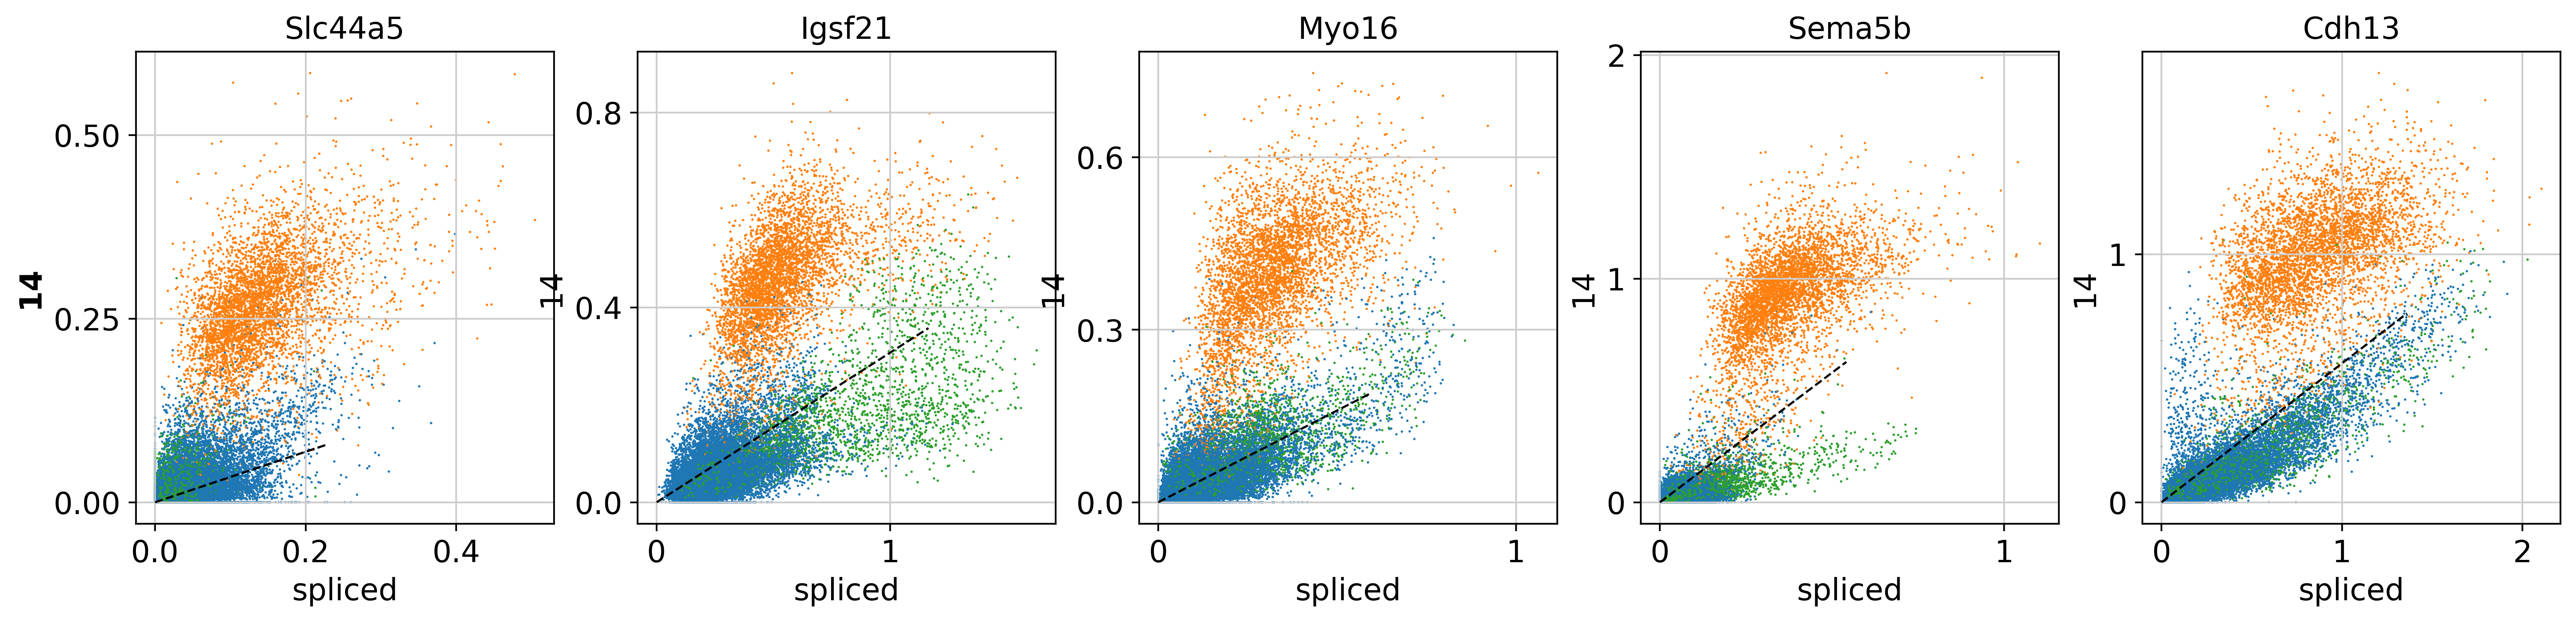

In [48]:
scv.pl.scatter(adata, df['0'][:5], ylabel='0', color='leiden')
scv.pl.scatter(adata, df['14'][:5], ylabel='14',color='leiden')

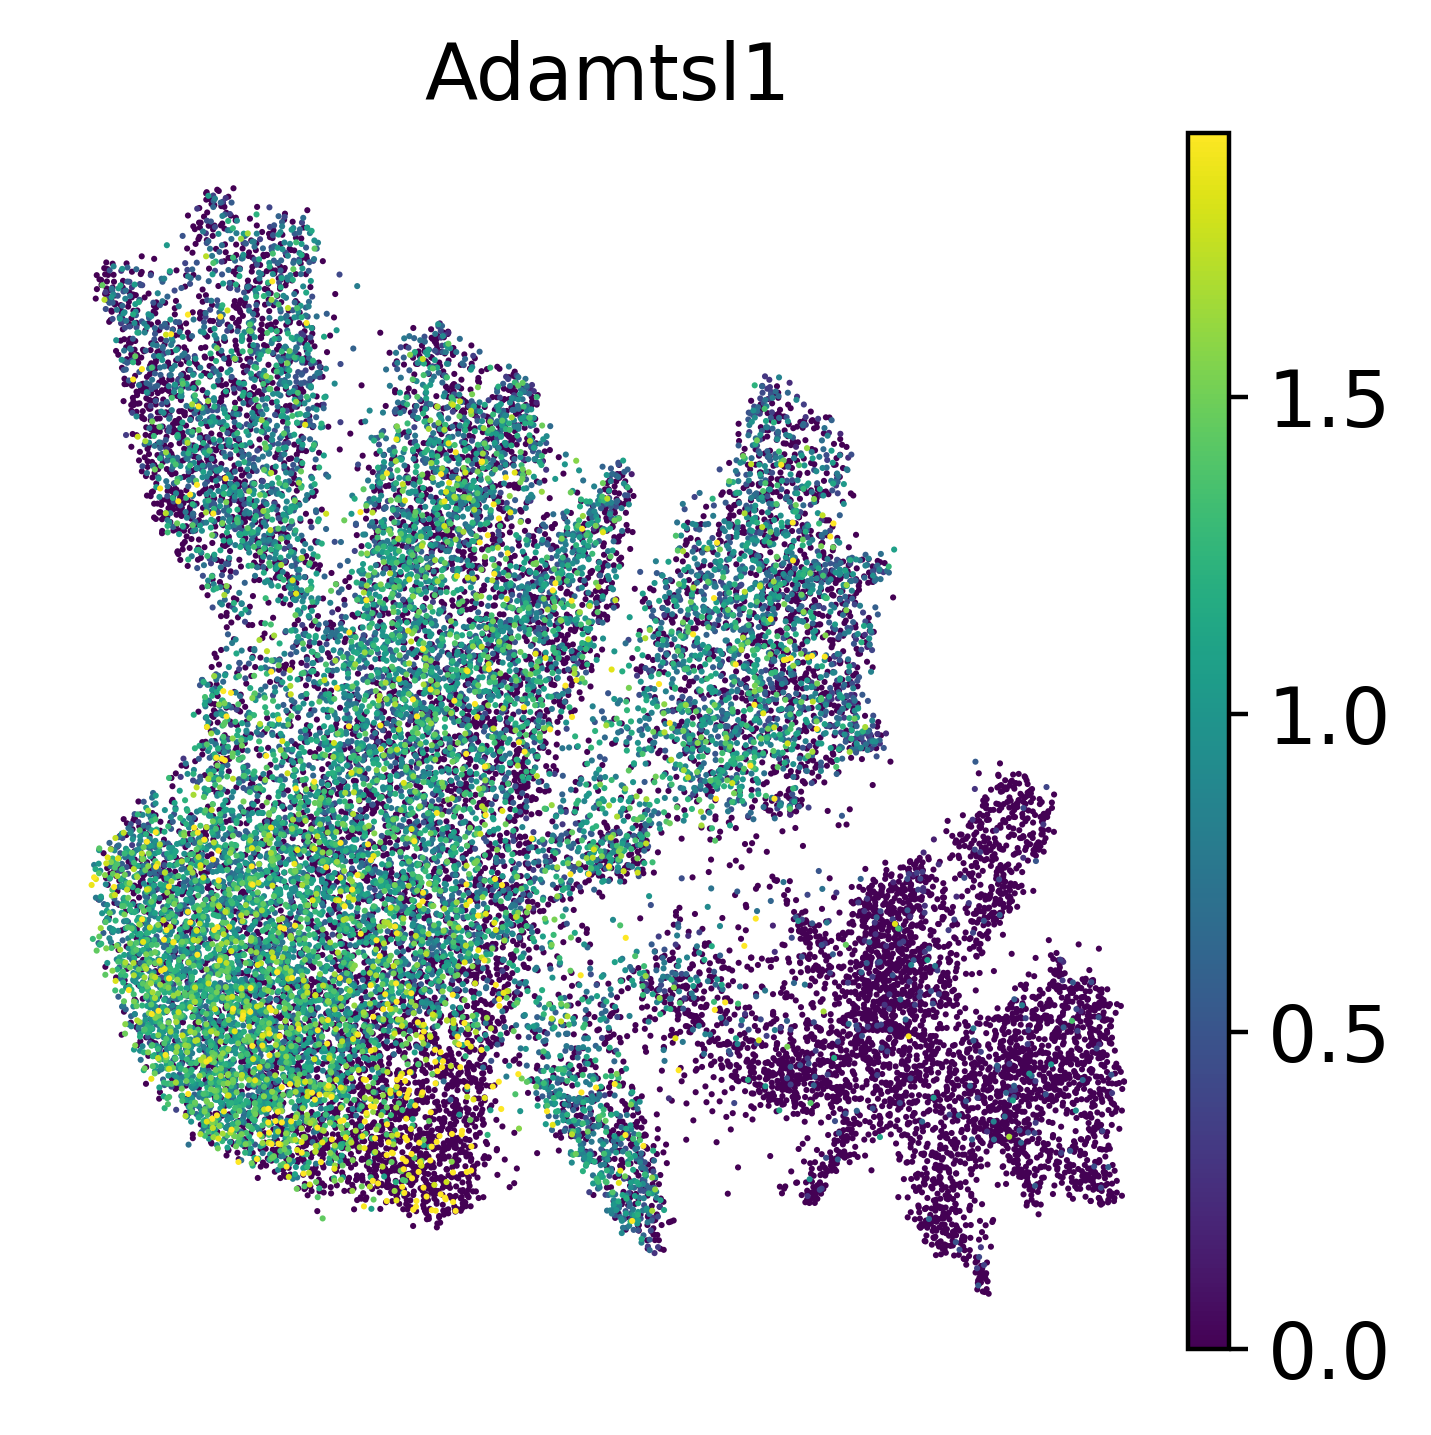

In [50]:
sc.pl.umap(adata,color='Adamtsl1',vmax='p99')